# Project: Investigate a Dataset -[Medical Appointment Attendance System]

# Introduction:

For this project I have selected 'No show appointments' dataset from a list of dataset provided to explore for our project analysis.Through this dataset which I named as'Medical Appointment Attendance System' I want to investigate and check that why patients miss their appointments as per scheduled date.This data set actually collects information from 100k medical appointments in Brazil and is focused to analyse as to why patients are missing their appointments.

# Dataset Description:
Defining 'Medical Appointment Attendance System' columns:
Now we will look how many columns are included in this data set and what is the relationship between them.

1-PatienId:This column is used to determine identification of a patient which has a unique value.No two patients can have same id.
2-AppointmentID:This is unique id that is generated against each appointment for every patient.
3-Gender:shows the gender of the patient as Male or Female. 
4-ScheduledDay:shows on which date patient is making his/her appointment booked.
5-AppointmentDay:Shows the actual date when appointment will take place.
6-Age:shows age of patient.
7-Neighbourhood:tells us location of appointment taking place which can be location of Medical center or Hospital.
8-Scholarship:if patient is getting subsidy from Brazilian Govt as a help.
9-Hipertension:This column shows if the patient has hypertension or not.
10-Diabetes:Shows if the patient is diabetic or not.
11-Alcoholism:shows as if patient is Alcoholic or not.
12-Handcap:Indicates if the patient is handicaped or not.
13-SMS_received:indicates if patient received a text msg from hospital for confirmation of appointment details.
14-No-show:This lalst column shows ‘No’ if the patient attented appointment, and ‘Yes’ if they did not attend appointment which is quite tricky.

# Question(s) for Analysis:

Following are the key questions for this system dataset analysis,I will keep exploring them in my report and will address them in my data analysis process with some conclusions derived at the end of this report.

What percentage of patients in this Medical Appointment Attendance System dataset Missed their scheduled appointments?

What are the key factors affecting patients to Miss their scheduled appointments?

Which area in this system/dataset requires further analysis to increase Number of patients showing up on their appointments and to overall improve system efficacy?

Are patients missing appointments are not receiving 'SMS'?

Is Alcoholism affecting their ability to show themselves on their appointments or are they missing appointments because of this factor?

In [2]:
#import required libraries to be used in this Project
#used Pandas which is an open source Python package that is most widely used for data science/data analysis and machine learning tasks.
#It is built on top of another package named Numpy, which provides support for multi-dimensional arrays.
import numpy as np
import pandas as pd
#Matplotib will be used for data visulaisation in this project
import matplotlib.pyplot as plt
#for exploration and understanding of data seaborn will be used.
import seaborn as sns

%matplotlib inline


# Data Wrangling:

Now we will perform a very important step for our data Analysis process on this 'Medical Appointment Attendance System'  which is data Wrangling It is actually the process comprising of following stages:

1-Collecting and gathering data
2-Transforming Raw data into another format for better understanding.

This Data wrangling will help us in decision-making and  analysis in less time. We will be able to understand our data of patients and their different attributes and dependencies of factors on which patient is able to show for his scheduled appointment date.In other words afte loading data we will be able to further investigate about datatypes of different attributes and their relationship.

In the Next phase we will check for data Cleanliness and then trim and clean our dataset for further analysis.

In [3]:
# Loading data and print out a few lines. 

df=pd.read_csv('Database_No_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#Performing operations to inspect data
# this returns a tuple of the dimensions of the dataframe
df.shape

(110527, 14)

The above output shows this data has 110527 rows and 14 columns.

In [5]:
# this will check datatype of each column in this data set which is very important for data analysis
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The above output shows PatientId is float which can be converted to INT datatype in datawrangling process.

In [6]:

#to check all data types of columns and to verify if there is NULL value or not
df.info()
#output shows there is no Null values and data types are accordingly 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# Above output shows the datatype for column Neighbourhood, ScheduledDay,AppointmentDay,Gender appears to be object, further
# investigation shows it's a string
type(df['Neighbourhood'][0])
type(df['ScheduledDay'][0])
type(df['AppointmentDay'][0])
type(df['Gender'][0])

str

strings will appear as objects in Pandas.

In [8]:

#to check nature of each data set we use following command
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


1-Above output shows that Age is having negative values which can be a human error/typing error. we can clean this value in data clenaing process in next step.Age also ranges from youg patients to old patients like 115.

2-patientid is an float datatype which can be converted to INT data type instaed of float.

3- scholarship column values are either '0' and '1' that means patients are getting welfare paymets from Brazilian Governmnet payment welfare system or they are not getting welfare payments.

4-similarly if we see column 'Hipertension' 'Diabetes' 'Alcoholism' they also have int values '0' or '1'.

5-Handcap column has max of 4 value which is to be analyzed that why this value is '4'?we will correct it in data cleaning process.

6-SMS_received is again '0' or '1'.

7- other columns seems to be missing so to analyse them statistically we use the following code:

In [9]:
df.describe(include ="all")
#Describing all columns of a DataFrame regardless of data type.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


Now we can statiscally analyse all columns in this dataset.

1-gender is either 'M' or 'F'(male or female) and data shows mostly Female patients are showing up on their appointment day.

2-No-show column is also like 'N'or 'Y' .

Also by analysing above data statistics we can analyse top='No' in No-show column which shows that most people are attending their appointments on scheduled time or on their appointment day.
freq shows Frequency of people attending appointments on scheduled day is 88208.

Mean value of Age is 37

Also 75th percentile of Age is 55.

In [10]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
 # here we can also check if AppointmentID is a unique row 
df.AppointmentID.nunique()

110527

# Data Cleaning:

Now we will clean our patient appointment system dataset to make it more readable and understandable.We will remove all descrepencies in our dataset and make it more readable.for data Cleaning process we will follow following steps.

1-Check for Missing Data:


In [12]:
#to check all data types of columns and to verify if there is NULL value or not
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [13]:
# to confirm that there are no null values in this dataset we can also use
df.isnull().sum().any()

False

The above output shows there is no Null values and data types are accordingly.


2-Check for Duplicates
In second step of data cleaning process we will check if there is any data duplication or any row that is repeating in our dataset.we use following code to check for duplicate rows.

In [14]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

The above output clearly shows that there is no duplicate data row in this dataset.

3-Check for Structure or incorrect data types in datset.



-PatientId is float data type which is correct as float data type in python represents real numbers and is written with a decimal point dividing the integer and fractional part.if we look at the above output dataset this seems very clear.
-AppointmentId in integer.
-Gender values are 'F' OR 'M' which is object.

-There are two misspelled columns in this dataset.one is Hipertension which should be Hypertension and other one is handcap which should be Handicap.
First we correct them:

In [15]:
#renaming misspelled columns and adding _ in few columns to give it more clarity.
df.rename(columns={"Hipertension": "Hypertension","AppointmentID": "Appointment_id","ScheduledDay": "Scheduled_date","AppointmentDay":"Appointment_date", "Handcap":"Handicapped", "No-show":"Attented_Appointment", "PatientId":"Patient_id"}, inplace=True)

In [16]:
df.Scheduled_date.unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [17]:
#The above data type should be datetime format in python
df.Scheduled_date = df.Scheduled_date.apply(np.datetime64)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Patient_id            110527 non-null  float64       
 1   Appointment_id        110527 non-null  int64         
 2   Gender                110527 non-null  object        
 3   Scheduled_date        110527 non-null  datetime64[ns]
 4   Appointment_date      110527 non-null  object        
 5   Age                   110527 non-null  int64         
 6   Neighbourhood         110527 non-null  object        
 7   Scholarship           110527 non-null  int64         
 8   Hypertension          110527 non-null  int64         
 9   Diabetes              110527 non-null  int64         
 10  Alcoholism            110527 non-null  int64         
 11  Handicapped           110527 non-null  int64         
 12  SMS_received          110527 non-null  int64         
 13 

In [19]:
df.Appointment_date.unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

In [20]:
#df.Appointment_date.unique()

In [21]:
#The above data type should be datetime format in python
df.Appointment_date = df.Appointment_date.apply(np.datetime64)

In [22]:
df.info()#to make sure both columns Appointment_date and Scheduled_date are in correct format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Patient_id            110527 non-null  float64       
 1   Appointment_id        110527 non-null  int64         
 2   Gender                110527 non-null  object        
 3   Scheduled_date        110527 non-null  datetime64[ns]
 4   Appointment_date      110527 non-null  datetime64[ns]
 5   Age                   110527 non-null  int64         
 6   Neighbourhood         110527 non-null  object        
 7   Scholarship           110527 non-null  int64         
 8   Hypertension          110527 non-null  int64         
 9   Diabetes              110527 non-null  int64         
 10  Alcoholism            110527 non-null  int64         
 11  Handicapped           110527 non-null  int64         
 12  SMS_received          110527 non-null  int64         
 13 

In [23]:
#Now lets analyse age column
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [24]:
#to remove negative value in Age
df = df[(df.Age >= 0)]

In [25]:
#to check unique values in new renamed Handicapped column
df.Handicapped.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [26]:
df.SMS_received.unique()

array([0, 1], dtype=int64)

In [27]:
df.Attented_Appointment.unique()

array(['No', 'Yes'], dtype=object)

In [28]:
#replacing last column values to make it less confused

In [30]:
df["Attented_Appointment"].replace({"Yes":0,"No":1},inplace=True)
df["Attented_Appointment"] = pd.to_numeric(df["Attented_Appointment"]) #change datatype for column to be numeric integer.

In [31]:
#shows data for last 5 rows
df.head()

,Patient_id,Appointment_id,Gender,Scheduled_date,Appointment_date,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Attented_Appointment
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


# Exploratory Data Analysis:

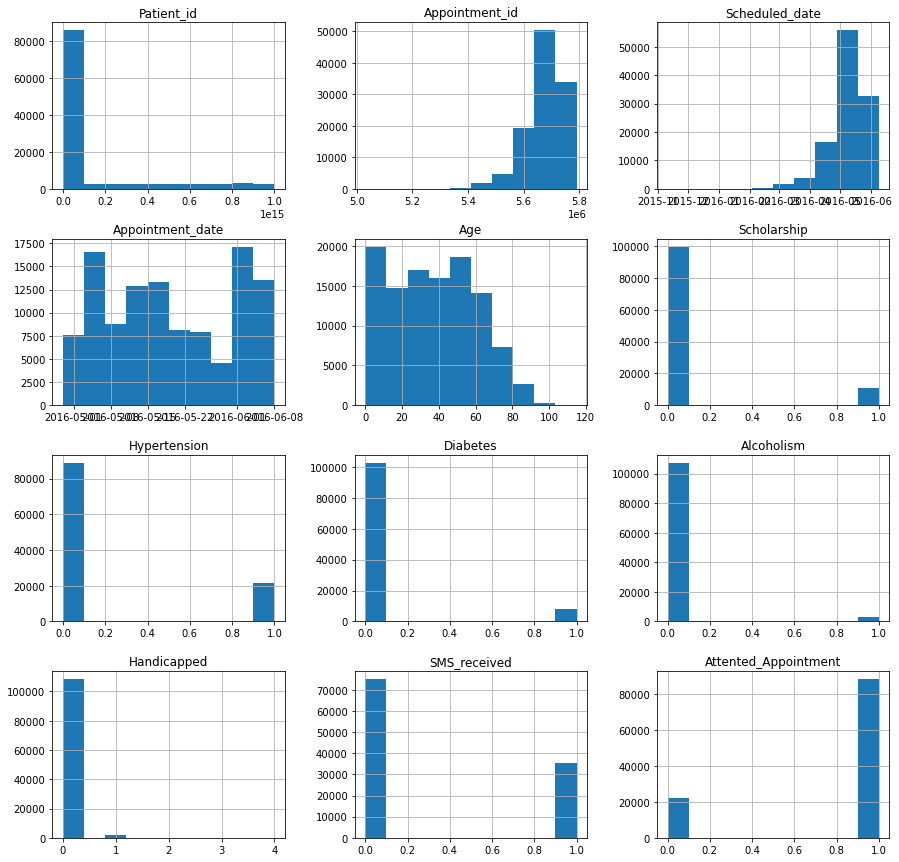

In [32]:
#Making Histograms to show values for data analysis.
#It shows count of each category for different columns in this Patients Not attending appointments dataset.
df.hist(figsize=(15,15));

Statistics/findings from histogram: 
1-Patient_id and Appointment_id has no statistical meaning. 
2-Age histogram is right shifted that shows that most of the patients in this dataset are Young patients.Most of the patients are in age group of 35-55 years of Age.
3-Scholorship histogram shows that only few patients in this Dataset are availing this Welfare scholorship from Brazilian Government.
4-Hyperyension among patients seems to be around 30%.
4-if we look at 'Diabetes' histograms it looks like there are very few patients in this datset with these two diseases.
5-very few patients are Alcoholic.same is the case with Handicapped that quite a few percentage of patients in this datset is handicapped.


More than 30% patients have received SMS for attending appointment and as a reminder.so its is a significant data element of this dataset.we can use this attribute in our Data Wrangling.

Similarly patients who have Hypertension is also significant so we can also use this column an important attribute to investigate this patients appointments dataset.


Research Question 1:
    What percentage of patients in this Medical Appointment Attendance System dataset Missed their scheduled appointments?

For Exploratory analysis it is impotant to first check what percentage of patients are attending appointments vs which percentage of patients are missing their appointments


In [33]:
#To find number of patients who were not able to attend their appointments or who didnt show up on their scheduled appointment date.
df.Not_Attented_Appointment_count= df[df["Attented_Appointment"]==0].count()["Patient_id"]

In [34]:
#print value of number of total patients who didnt attend their appointment.
print (df.Not_Attented_Appointment_count)

22319


In [35]:
#To find number of patients who attended their scheduled appointments or who attented their scheduled appointment date.
df.Attented_Appointment_count= df[df["Attented_Appointment"]==1].count()["Patient_id"]

In [36]:
#print value of number of total patients who attended their appointment.
print (df.Attented_Appointment_count)

88207


In [37]:
df.head()#displaying few rows of dataset

,Patient_id,Appointment_id,Gender,Scheduled_date,Appointment_date,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Attented_Appointment
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


#     Question:
       
       What percentage of Patients are attending their appointments and what percentage of patients is missing on their appointments as scheduled by this health system?
        
        To address this main question in this Patients appointment dataset we should draw a pie chart using Matplotlib library in pandas.
        By using Pyplot, we can use the pie() function to draw pie charts.
        Matplotlib is actually a graph plotting library in python that serves as a visualization utility.so to visualize our data to get better idea of further data investigation we should initially draw a pie chart to get clear picture of this appointment dataset as if how much % of patients is attending appointment and which % of patients is missing appointments.
        This analysis will later on help this Brazilian patients appointment system to work effectively and effeciently and utilize their resources ina better way to upgrade this health appointments system.
        

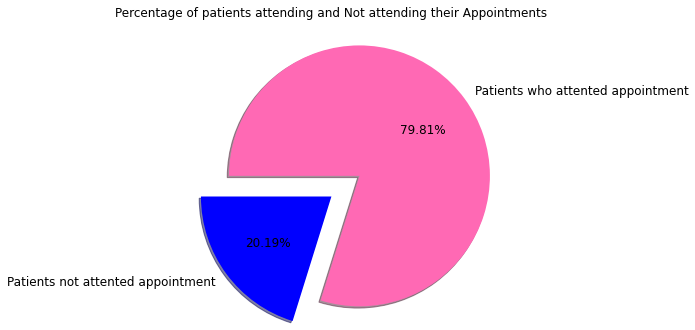

In [38]:
pie_chart = np.array([df.Not_Attented_Appointment_count,df.Attented_Appointment_count])

#gives label to pie chart for better understanding by visualisation.
mylabels = ["Patients not attented appointment", "Patients who attented appointment"]
#to seperate wedge for clear pictorial view of data
myexplode = [0, 0.4]
#to give pie chart color of ur own choice.
mycolors = ["blue", "hotpink"]

#we want to know % of patients attending and not attending their appointments in the following pie chart ,we used autopct for this purpose and used 0.2 for two decimal places.
plt.pie(pie_chart, radius=1.5 , shadow=True ,labels =mylabels, explode = myexplode, startangle=180, autopct='%0.2f%%', textprops = {"fontsize":12}, colors = mycolors)
# title for clear understanding
plt.title("Percentage of patients attending and Not attending their Appointments",y=1.3);
plt.show() 

# Analysis/Answer to Question posed above:

    Above analysis from this Pie chart clearly depicts that 79.81% of Patients in this dataset are attending their Medical appointments Whereas 20.19% are Not attending their appointments.This is Initial analysis Later on we can pose further questions to check which factors are more dependent on the number of patients to attend their appointments in time or which factors are causing patients to miss their scheduled appointments.This will further improve system efficacy.

# Question:
Do Patients who received 'SMS' reminder for their appointment confirmation with all details are able to attend appointments more than the patients who didn't received 'SMS'?


To analyse/answer above question we should first check relation ship between 'SMS_received' and 'Attented_Appointment' columns.


In [39]:
#Calculating count of patients receiving SMS 
df_SMS_received=df[df["SMS_received"]==1].count()["Patient_id"]

In [40]:
print(df_SMS_received)#count of patients receiving SMS 

35482


In [41]:
#Calculating count of patients not receiving 'SMS' as reminder
df_No_SMS_received=df[df["SMS_received"]==0].count()["Patient_id"]

In [42]:
print(df_No_SMS_received)#count of patients not receiving SMS 

75044


2-
1st Scenario:

Now we will calculate:
a) number of patients attending their appointments as per scheduled while 'Receiving SMS' too along with its %.
b) number of patients who are not attending appointment and receiving 'SMS' reminders too along with its %.

Second Scenario:

Now we will calculate:
a) number of patients attending their appointments as per scheduled while 'Not Receiving SMS' along with its %.
b) number of patients who are not attending appointment and 'Not Receiving 'SMS' reminders along with its %.


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Patient_id            110526 non-null  float64       
 1   Appointment_id        110526 non-null  int64         
 2   Gender                110526 non-null  object        
 3   Scheduled_date        110526 non-null  datetime64[ns]
 4   Appointment_date      110526 non-null  datetime64[ns]
 5   Age                   110526 non-null  int64         
 6   Neighbourhood         110526 non-null  object        
 7   Scholarship           110526 non-null  int64         
 8   Hypertension          110526 non-null  int64         
 9   Diabetes              110526 non-null  int64         
 10  Alcoholism            110526 non-null  int64         
 11  Handicapped           110526 non-null  int64         
 12  SMS_received          110526 non-null  int64         
 13 

In [44]:
df.head()

,Patient_id,Appointment_id,Gender,Scheduled_date,Appointment_date,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Attented_Appointment
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [45]:
#To find number of patients who were not able to attend their appointments or who didnt show up on their scheduled appointment date.
df.Attented_Appointment_count2= df[df["Attented_Appointment"]==0].count()["Patient_id"]

In [46]:
#print value of number of total patients who didnt attend their appointment.
print (df.Attented_Appointment_count2)

22319


In [47]:
import numpy as np

idx = np.where((df['SMS_received']==1) & (df['Attented_Appointment']==1))

In [48]:
print(idx)

(array([    15,     18,     25, ..., 110523, 110524, 110525], dtype=int64),)


In [49]:
#calculating total number of patients who received 'SMS' and also attended appointment.
df_SMS = df.loc[(df["SMS_received"]==1) & (df["Attented_Appointment"]==1)]["Attented_Appointment"].count() 


In [50]:
print(df_SMS)#print number of patients who received 'SMS' and also attended appointment.


25698


In [51]:
#calculating total number of patients who didnt receive 'SMS' but attended appointment.
df_SMS1 = df.loc[(df["SMS_received"]==0) & (df["Attented_Appointment"]==1)]["Attented_Appointment"].count()


In [52]:
print(df_SMS1)#print total number of patients who didnt receive 'SMS' but attended appointment.


62509


In [53]:
#calculating total number of patients wh oreceived 'SMS' but didnot attend appointment.
df_SMS2 = df.loc[(df["SMS_received"]==1) & (df["Attented_Appointment"]==0)]["Attented_Appointment"].count() 

In [54]:
print(df_SMS2)#print total number of patients who received 'SMS' but didnot attend appointment.

9784


In [55]:
#calculating total number of patients who didnot receive 'SMS' and also didnot attend appointment.
df_SMS3 = df.loc[(df["SMS_received"]==0) & (df["Attented_Appointment"]==0)]["Attented_Appointment"].count() 

In [56]:
print(df_SMS3)#print total number of patients who didnot receive 'SMS' and also didnot attend appointment.

12535


Calculating Mean:

In [57]:
#%OF PATIENTS WHO ATTENTED APPOINTMENT WITH RECEIVING SMS:
df_SMS=df[df["SMS_received"]==1] ["Attented_Appointment"].mean()
print(df_SMS)

0.7242545516036301


In [58]:
#%OF PATIENTS WHO ATTENTED APPOINTMENT WITHOUT RECEIVING SMS:
df_noSMS=df[df["SMS_received"]==0] ["Attented_Appointment"].mean()
print(df_noSMS)

0.8329646607323703


 Analysis:
 Above calculation shows that %of patients who attended appointments without receiving SMS reminders is higher than the % of patients who attended appointments with receiving SMS.This seems quite strange to me!!!

Bar Plot to further show analysis:
# Bar plot the percentage of Patients Attending Appointments With SMS:



Text(0.5, 1.0, 'SMS_received VS Patients Attented Appointments')

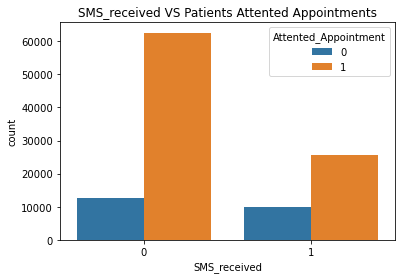

In [59]:
# Plotting SMS_received VS Patients Attented Appointments

#seaborn.countplot()Show the counts of observations in each categorical bin using bars.
#A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.
#The basic API and options are identical to those for barplot(), so we can compare counts across nested variables.

eff_sms = sns.countplot(x = 'SMS_received',hue = 'Attented_Appointment' , data = df)
eff_sms.set_title('SMS_received VS Patients Attented Appointments')


# Result /Findings:

This also varifies our findings that patients attending MORE appointments are not receiving SMS.So surprisingly in this Patients appointments attending dataset 'SMS'is not playing significant role apparently.

These are 4 case scenarios where 
SMS =1 means patients are getting SMS and vice versa.
App=1 means attending appointment and vice versa.
and number shows total count of patients with these conditions.

SMS=1 APP=1  =25698
SMS=1 APP=0 =9784
SMS=0 APP=1  62510
SMS=0 APP=0  12535

But if we analyse data carefully we Will come to know that '12535' number of patients are still not receiving 'SMS'and are not showing up on appointments,that mean they might be missing their appointments because they forgot and if they will receive 'SMS' reminder than they will be able to show up on their appointments dates.


So we should send maximum patients with 'SMS' to make appointments attending patient % slightly more,which in return will make this appointments system better and effective and will waste less resources.so by improving SMS received feature in this sytem we can show up more increase in number of patients attending appointments

# Question:
Are more Patients with 'Scholorship' coming to appointments or In other words Is Brazilian welfare payment is affecting number of patients to attentd their appointments?

To answer above question we have to analyse 'Scholorship' column in this dataset and its effect on number of patients able to attend their appointment.
Actually Scholorship column refers to the payment that is given by Brazilian Govt to poor and needy people as a subsidy.so this column value '0' represents as if the patient is not receivng that payment either because he/she is not eligible to get that payment or patient is not yet registered or so.
We have to analyse that if the patient is able to receive the government subsidy - the "Bolsa familia",Is that impacting No of patients attending appointments or showing up.
So first all we calculate % of patients receiving'Scholorship':

In [60]:
#finding Total patients who are able to receive the government subsidy - the "Bolsa familia
rec_scholorship= df[df['Scholarship']==1]
total_rec_scholorship= rec_scholorship.shape[0]
#print(rec_scholorship)
print(total_rec_scholorship)#printing number of patients who are able to receive the government subsidy - the "Bolsa familia


10861


In [61]:
#Total patients who are not receiving the government subsidy - the "Bolsa familia
not_rec_scholorship= df[df['Scholarship']==0]
total_not_rec_scholorship= not_rec_scholorship.shape[0]
#print(rec_scholorship)
print(total_not_rec_scholorship)#printing total patients who are not receiving the government subsidy - the "Bolsa familia


99665


In [62]:
#Patient's number who received scholorship and attented appointment
patients_attented_recscholorship = (rec_scholorship["Attented_Appointment"]==1).sum()

In [63]:
print(patients_attented_recscholorship)

8283


In [64]:
#Patient's number who received scholorship but not attented appointment
patients_not_attented_recscholorship = (rec_scholorship["Attented_Appointment"]==0).sum()

In [65]:
print(patients_not_attented_recscholorship)

2578


In [66]:
#Patient's number who are not receiving scholorship but attending appointment
patients_attented_notrecscholorship = (not_rec_scholorship["Attented_Appointment"]==1).sum()

In [67]:
print(patients_attented_notrecscholorship)

79924


In [68]:
#Patient's number not receiving scholorship and not attending appointment
patients_not_attented_notrecscholorship = (not_rec_scholorship["Attented_Appointment"]==0).sum()

In [69]:
print(patients_not_attented_notrecscholorship)

19741


In [70]:
a=round(patients_attented_recscholorship/total_rec_scholorship,2)*100
print(a)

76.0


In [71]:
c=round(patients_attented_notrecscholorship/total_not_rec_scholorship,2)*100
print(c)


80.0


In [72]:
patients_not_attented_recscholorship = (rec_scholorship["Attented_Appointment"]==0).sum()

In [73]:
print(patients_not_attented_recscholorship)

2578


In [74]:
b=round(patients_not_attented_recscholorship/total_rec_scholorship,2)*100
print(b)

24.0


In [75]:
print("Percentage of patients Attending their Appointment who are able to receive the government subsidy - the 'Bolsa familia' is {}%, Whereas % of patients who are not attending appointmnents while getting the government subsidy - the 'Bolsa familia' is {}%."
      .format(a,b))

Percentage of patients Attending their Appointment who are able to receive the government subsidy - the 'Bolsa familia' is 76.0%, Whereas % of patients who are not attending appointmnents while getting the government subsidy - the 'Bolsa familia' is 24.0%.


In [76]:
print("Percentage of patients Attending their Appointment who are not receiving the government subsidy - the 'Bolsa familia' is {}%" .format(c))

Percentage of patients Attending their Appointment who are not receiving the government subsidy - the 'Bolsa familia' is 80.0%


# Findings:
So it shows that higher number of patients are showing up on their appointments while not getting any subsidy/scholorship so this factor doesn't impact much.

# Question:

Is delay in booking time of appointment to its actual appointment date is affecting number of patients attending appointment?

To analyse above question,we have to study relationship between column Scheduled_date(which shows when appointment was booked by a Patient) and Appointment_date(When actual appointment took place).

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Patient_id            110526 non-null  float64       
 1   Appointment_id        110526 non-null  int64         
 2   Gender                110526 non-null  object        
 3   Scheduled_date        110526 non-null  datetime64[ns]
 4   Appointment_date      110526 non-null  datetime64[ns]
 5   Age                   110526 non-null  int64         
 6   Neighbourhood         110526 non-null  object        
 7   Scholarship           110526 non-null  int64         
 8   Hypertension          110526 non-null  int64         
 9   Diabetes              110526 non-null  int64         
 10  Alcoholism            110526 non-null  int64         
 11  Handicapped           110526 non-null  int64         
 12  SMS_received          110526 non-null  int64         
 13 

In [78]:
#ading a new column named 'Waiting_period' to calculate difference in Appointment date to scheduled date.
df['Waiting_period'] = (df.Appointment_date.dt.date - df.Scheduled_date.dt.date).dt.days
df= df[(df.Waiting_period>=0)]

In [79]:
df.info()#to make sure new column for waiting period is added

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Patient_id            110521 non-null  float64       
 1   Appointment_id        110521 non-null  int64         
 2   Gender                110521 non-null  object        
 3   Scheduled_date        110521 non-null  datetime64[ns]
 4   Appointment_date      110521 non-null  datetime64[ns]
 5   Age                   110521 non-null  int64         
 6   Neighbourhood         110521 non-null  object        
 7   Scholarship           110521 non-null  int64         
 8   Hypertension          110521 non-null  int64         
 9   Diabetes              110521 non-null  int64         
 10  Alcoholism            110521 non-null  int64         
 11  Handicapped           110521 non-null  int64         
 12  SMS_received          110521 non-null  int64         
 13 

In [80]:
df.head(15)

,Patient_id,Appointment_id,Gender,Scheduled_date,Appointment_date,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Attented_Appointment,Waiting_period
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,1,2
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0,2
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0,2
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,1,0
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,1,2


In [81]:
#Waiting_period and Attented_Appointment relationship

In [82]:
Waiting_time_difference = df[['Attented_Appointment', 'Waiting_period']].groupby('Waiting_period').count()

In [83]:
print(Waiting_time_difference)

                Attented_Appointment
Waiting_period                      
0                              38562
1                               5213
2                               6725
3                               2737
4                               5290
...                              ...
155                               10
162                               11
169                                8
176                               16
179                               10

[129 rows x 1 columns]


Text(0, 0.5, 'Number of Patients')

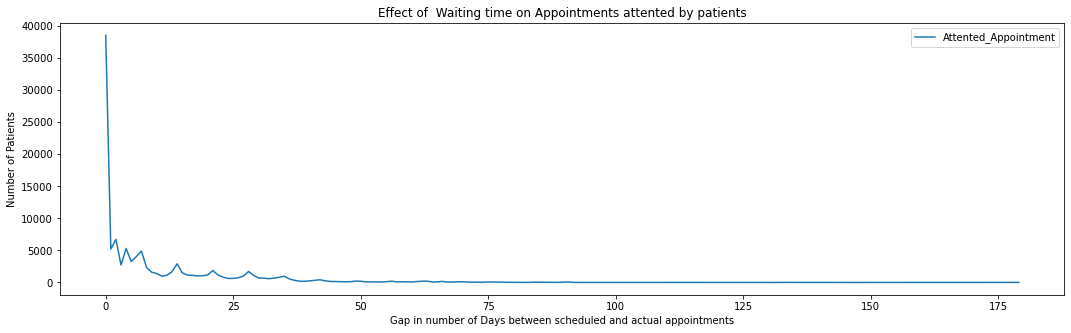

In [84]:
Waiting_time_difference.plot(kind='line', figsize=(18,5))
plt.title("Effect of  Waiting time on Appointments attented by patients")
plt.xlabel('Gap in number of Days between scheduled and actual appointments')
plt.ylabel('Number of Patients')


Findings:

Above line graph clearly depicts that more the waiting time has an impact on number of patients attending appointments.Idf Gap between Scheduled appointment and actual appointment is less that nore number of people/patients are showing up or attending their respective apoointments.
similarly if patient is booking appointment on same day then they are more likely to attend their appointments.when there is a big gap in number fo days for scheduled and actual appointment than they are less likely to attend their appointments.

# Conclusions:

1-This analysis report findings show that 79.81% of Patients in this 'Medical Appointment Attendance System'dataset are attending their Medical appointments Whereas 20.19% are Not attending their appointments.This shows that higher number of patients are showing up but to make it maximum system must improve.

2-One of the key factor affecting patients to miss out their scheduled appointments is their waiting time which is the difference in their booking appointment date and their original appointment date.If Gap between Scheduled appointment and actual appointment is less than more number of people/patients are showing up or attending their respective apoointments. similarly if patient is booking appointment on same day then they are more likely to attend their appointments.when there is a large gap in number of days for scheduled and actual appointment than they are less likely to attend their appointments.

3-This report analysis also tells that patients attending MORE appointments are not receiving SMS.So surprisingly in this Medical Appointment Attendance System dataset 'SMS'is not playing significant role apparently.

4-Scolorship program of Brazilian Government is not impacting this systems efficacy as report analysis of this datset shows that higher number of patients are showing up on their appointments while not getting any subsidy/scholorship so this factor doesn't impact much.

5-If we look at histograms for different problems in patients like Hypertension,Alcoholism etc it shows that % of Alcoholisim and Handcap is extremly low among patients in this system.likewise % of patients who have diabetes and patients who re getting Government subsidy is not more than 5 to 6%.


# Limitations:

 Patients attending MORE appointments are not receiving SMS.So surprisingly in this Patients appointments attending dataset 'SMS'is not playing significant role apparently.This is one of the limitations in this system.As we know that these days 'SMS' reminders play a significant role in evryones life ,So we should send maximum patients with 'SMS' to make appointments attending patient % slightly more,which in return will make this appointments system better and effective and will waste less resources.so by improving SMS received feature in this sytem we can show up more increase in number of patients attending appointments